In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import time
from pathlib import Path

import pandas as pd
import numpy as np
import PIL
from tqdm import tqdm
from functools import partial

from fastai.vision import *
from fastai.metrics import accuracy

import random

from IPython.display import Image
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import torch
os.getcwd()

'/content'

In [3]:
train_df = pd.read_csv('/content/drive/My Drive/EAST/Fashion_Data/fashion_train.csv')
valid_df = pd.read_csv('/content/drive/My Drive/EAST/Fashion_Data/fashion_valid.csv')

In [4]:
train_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fname
0,40435,Women,Apparel,Topwear,Tops,White,Summer,Casual,40435.jpg
1,18612,Men,Apparel,Topwear,Tshirts,Black,Fall,Sports,18612.jpg
2,21998,Women,Accessories,Bags,Handbags,Blue,Winter,Casual,21998.jpg
3,25235,Women,Accessories,Bags,Backpacks,Blue,Winter,Casual,25235.jpg
4,8078,Men,Footwear,Sandal,Sandals,Blue,Fall,Casual,8078.jpg


In [5]:
valid_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fname
0,19120,Unisex,Footwear,Flip Flops,Flip Flops,Red,Fall,Casual,19120.jpg
1,19876,Men,Footwear,Flip Flops,Flip Flops,Blue,Fall,Casual,19876.jpg
2,36915,Men,Accessories,Wallets,Wallets,Brown,Winter,Casual,36915.jpg
3,6052,Men,Apparel,Topwear,Shirts,Pink,Summer,Casual,6052.jpg
4,59563,Men,Accessories,Jewellery,Pendant,Steel,Summer,Casual,59563.jpg


In [7]:
train_df = train_df.drop(['id'], axis=1)
valid_df = valid_df.drop(['id'], axis=1)

In [12]:
train_df['fpath'] = '/Fashion_Data/training_img/' + train_df['fname']

In [13]:
train_df

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fname,fpath
0,Women,Apparel,Topwear,Tops,White,Summer,Casual,40435.jpg,/Fashion_Data/training_img/40435.jpg
1,Men,Apparel,Topwear,Tshirts,Black,Fall,Sports,18612.jpg,/Fashion_Data/training_img/18612.jpg
2,Women,Accessories,Bags,Handbags,Blue,Winter,Casual,21998.jpg,/Fashion_Data/training_img/21998.jpg
3,Women,Accessories,Bags,Backpacks,Blue,Winter,Casual,25235.jpg,/Fashion_Data/training_img/25235.jpg
4,Men,Footwear,Sandal,Sandals,Blue,Fall,Casual,8078.jpg,/Fashion_Data/training_img/8078.jpg
...,...,...,...,...,...,...,...,...,...
1978,Men,Apparel,Topwear,Shirts,Black,Fall,Formal,11109.jpg,/Fashion_Data/training_img/11109.jpg
1979,Men,Accessories,Eyewear,Sunglasses,Brown,Winter,Casual,38213.jpg,/Fashion_Data/training_img/38213.jpg
1980,Women,Accessories,Bags,Clutches,Blue,Summer,Casual,31926.jpg,/Fashion_Data/training_img/31926.jpg
1981,Women,Apparel,Saree,Sarees,Pink,Summer,Ethnic,57976.jpg,/Fashion_Data/training_img/57976.jpg


In [14]:
train_df['labels'] = train_df['gender'] + ';' + train_df['masterCategory'] + ';' + train_df['subCategory'] + ';' + train_df['articleType'] + ';' + train_df['baseColour'] + ';' + train_df['season'] + ';' + train_df['usage'] 

In [15]:
train_df = train_df.drop(['fname'],axis =1)

In [16]:
train_df

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fpath,labels
0,Women,Apparel,Topwear,Tops,White,Summer,Casual,/Fashion_Data/training_img/40435.jpg,Women;Apparel;Topwear;Tops;White;Summer;Casual
1,Men,Apparel,Topwear,Tshirts,Black,Fall,Sports,/Fashion_Data/training_img/18612.jpg,Men;Apparel;Topwear;Tshirts;Black;Fall;Sports
2,Women,Accessories,Bags,Handbags,Blue,Winter,Casual,/Fashion_Data/training_img/21998.jpg,Women;Accessories;Bags;Handbags;Blue;Winter;Ca...
3,Women,Accessories,Bags,Backpacks,Blue,Winter,Casual,/Fashion_Data/training_img/25235.jpg,Women;Accessories;Bags;Backpacks;Blue;Winter;C...
4,Men,Footwear,Sandal,Sandals,Blue,Fall,Casual,/Fashion_Data/training_img/8078.jpg,Men;Footwear;Sandal;Sandals;Blue;Fall;Casual
...,...,...,...,...,...,...,...,...,...
1978,Men,Apparel,Topwear,Shirts,Black,Fall,Formal,/Fashion_Data/training_img/11109.jpg,Men;Apparel;Topwear;Shirts;Black;Fall;Formal
1979,Men,Accessories,Eyewear,Sunglasses,Brown,Winter,Casual,/Fashion_Data/training_img/38213.jpg,Men;Accessories;Eyewear;Sunglasses;Brown;Winte...
1980,Women,Accessories,Bags,Clutches,Blue,Summer,Casual,/Fashion_Data/training_img/31926.jpg,Women;Accessories;Bags;Clutches;Blue;Summer;Ca...
1981,Women,Apparel,Saree,Sarees,Pink,Summer,Ethnic,/Fashion_Data/training_img/57976.jpg,Women;Apparel;Saree;Sarees;Pink;Summer;Ethnic


In [17]:
train_df.shape

(1983, 9)

In [18]:
valid_df

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fname
0,Unisex,Footwear,Flip Flops,Flip Flops,Red,Fall,Casual,19120.jpg
1,Men,Footwear,Flip Flops,Flip Flops,Blue,Fall,Casual,19876.jpg
2,Men,Accessories,Wallets,Wallets,Brown,Winter,Casual,36915.jpg
3,Men,Apparel,Topwear,Shirts,Pink,Summer,Casual,6052.jpg
4,Men,Accessories,Jewellery,Pendant,Steel,Summer,Casual,59563.jpg
...,...,...,...,...,...,...,...,...
283,Men,Accessories,Socks,Socks,Blue,Summer,Formal,12395.jpg
284,Women,Apparel,Topwear,Tops,Green,Fall,Casual,11481.jpg
285,Women,Accessories,Watches,Watches,White,Winter,Casual,43158.jpg
286,Men,Accessories,Eyewear,Sunglasses,Black,Winter,Casual,30576.jpg


In [20]:
valid_df['fpath'] = '/Fashion_Data/valid_img/' + valid_df['fname']

In [21]:
valid_df

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fname,fpath
0,Unisex,Footwear,Flip Flops,Flip Flops,Red,Fall,Casual,19120.jpg,/Fashion_Data/valid_img/19120.jpg
1,Men,Footwear,Flip Flops,Flip Flops,Blue,Fall,Casual,19876.jpg,/Fashion_Data/valid_img/19876.jpg
2,Men,Accessories,Wallets,Wallets,Brown,Winter,Casual,36915.jpg,/Fashion_Data/valid_img/36915.jpg
3,Men,Apparel,Topwear,Shirts,Pink,Summer,Casual,6052.jpg,/Fashion_Data/valid_img/6052.jpg
4,Men,Accessories,Jewellery,Pendant,Steel,Summer,Casual,59563.jpg,/Fashion_Data/valid_img/59563.jpg
...,...,...,...,...,...,...,...,...,...
283,Men,Accessories,Socks,Socks,Blue,Summer,Formal,12395.jpg,/Fashion_Data/valid_img/12395.jpg
284,Women,Apparel,Topwear,Tops,Green,Fall,Casual,11481.jpg,/Fashion_Data/valid_img/11481.jpg
285,Women,Accessories,Watches,Watches,White,Winter,Casual,43158.jpg,/Fashion_Data/valid_img/43158.jpg
286,Men,Accessories,Eyewear,Sunglasses,Black,Winter,Casual,30576.jpg,/Fashion_Data/valid_img/30576.jpg


In [23]:
valid_df['labels'] = valid_df['gender'] + ';' + valid_df['masterCategory'] + ';' +valid_df['subCategory'] + ';' + valid_df['articleType'] + ';' +valid_df['baseColour'] + ';' +valid_df['season'] + ';' + valid_df['usage']

In [24]:
valid_df = valid_df.drop(['fname'], axis=1)

In [25]:
valid_df

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fpath,labels
0,Unisex,Footwear,Flip Flops,Flip Flops,Red,Fall,Casual,/Fashion_Data/valid_img/19120.jpg,Unisex;Footwear;Flip Flops;Flip Flops;Red;Fall...
1,Men,Footwear,Flip Flops,Flip Flops,Blue,Fall,Casual,/Fashion_Data/valid_img/19876.jpg,Men;Footwear;Flip Flops;Flip Flops;Blue;Fall;C...
2,Men,Accessories,Wallets,Wallets,Brown,Winter,Casual,/Fashion_Data/valid_img/36915.jpg,Men;Accessories;Wallets;Wallets;Brown;Winter;C...
3,Men,Apparel,Topwear,Shirts,Pink,Summer,Casual,/Fashion_Data/valid_img/6052.jpg,Men;Apparel;Topwear;Shirts;Pink;Summer;Casual
4,Men,Accessories,Jewellery,Pendant,Steel,Summer,Casual,/Fashion_Data/valid_img/59563.jpg,Men;Accessories;Jewellery;Pendant;Steel;Summer...
...,...,...,...,...,...,...,...,...,...
283,Men,Accessories,Socks,Socks,Blue,Summer,Formal,/Fashion_Data/valid_img/12395.jpg,Men;Accessories;Socks;Socks;Blue;Summer;Formal
284,Women,Apparel,Topwear,Tops,Green,Fall,Casual,/Fashion_Data/valid_img/11481.jpg,Women;Apparel;Topwear;Tops;Green;Fall;Casual
285,Women,Accessories,Watches,Watches,White,Winter,Casual,/Fashion_Data/valid_img/43158.jpg,Women;Accessories;Watches;Watches;White;Winter...
286,Men,Accessories,Eyewear,Sunglasses,Black,Winter,Casual,/Fashion_Data/valid_img/30576.jpg,Men;Accessories;Eyewear;Sunglasses;Black;Winte...


In [26]:
len(valid_df)

288

In [ ]:
#save the new csvs
train_df.to_csv('/content/model_trainEAST.csv', index = False)
valid_df.to_csv('/content/model_validEast.csv', index = False)

#Load on restart
#train_df = pd.read_csv('/content/model_trainEAST.csv')
#valid_df = pd.read_csv('/content/model_validEast.csv')

In [27]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
??get_transforms

In [ ]:
??ImageList.from_csv

In [28]:
# Creating the imagelists.
train_list = ImageList.from_df(train_df[['fpath', 'labels']], path=Path('/content/drive/My Drive/EAST/'))
valid_list = ImageList.from_df(valid_df[['fpath', 'labels']], path=Path('/content/drive/My Drive/EAST/'))

In [29]:
train_list

ImageList (1983 items)
Image (3, 80, 60),Image (3, 80, 60),Image (3, 80, 60),Image (3, 80, 60),Image (3, 80, 60)
Path: /content/drive/My Drive/EAST

In [30]:
valid_list

ImageList (288 items)
Image (3, 80, 60),Image (3, 80, 60),Image (3, 80, 60),Image (3, 80, 60),Image (3, 80, 60)
Path: /content/drive/My Drive/EAST

In [ ]:
#Dataloader(dataset, bs, shuffle, sampler, num_workers=, etc)
#Combines the dataset and sampler and provides single/ multi process iterators to iterate over the dataset
#dataset - from where to load the dataset
#Dataloader doesn't have a provision for combining validation data

#SO fastai DataBunch - Binds together train dataloader and validation dataloader and optionally test dataloader

In [31]:
sd = train_list.split_by_list(train = train_list, valid = valid_list).label_from_df(label_delim=';')       #To tell the model where the images and labels come from 

In [33]:
#DATA BLOCK API -- FASTAI
# Calling seed() to ensure reproducibilty.
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')
data = (sd.transform(tfms=tfms, size = 128)                      # performing transforms on dataset
        .databunch(bs=32)                                        # create the dataloader and databunch in 1 go
        .normalize(imagenet_stats))                              # normalize with imagenet stats

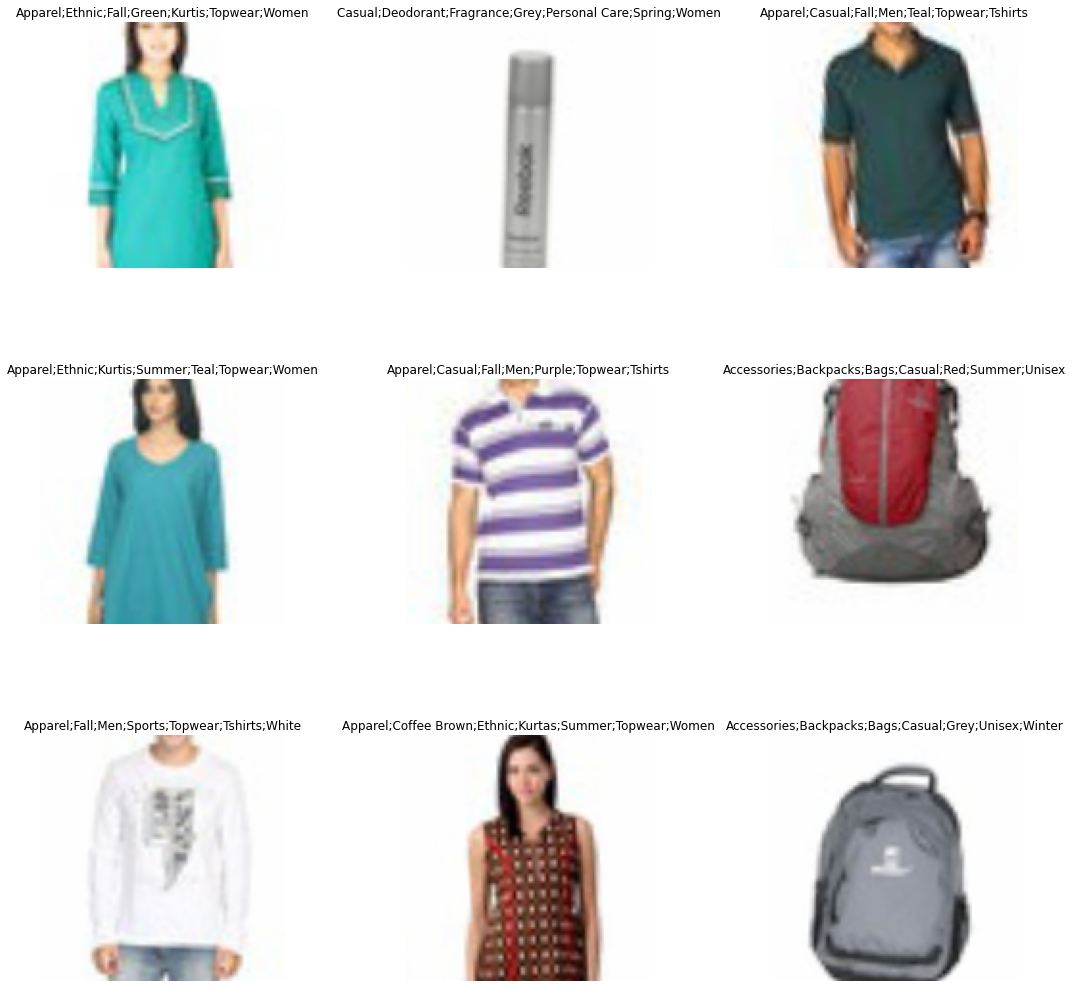

In [34]:
#display samples 
data.show_batch(rows=3, figsize=(15,15))

In [35]:
#Labels: total number and names
#data.c --- a databunch has a special attribute called c which tells how many outputs does the model need to create; so for this classifier, 
                                                                                 #we want one probabilty for each of the 200 classes
data.c, data.classes                   

(181,
 ['Accessories',
  'Accessory Gift Set',
  'Apparel',
  'Apparel Set',
  'Baby Dolls',
  'Backpacks',
  'Bags',
  'Bangle',
  'Bath Robe',
  'Beige',
  'Belts',
  'Black',
  'Blue',
  'Bottomwear',
  'Boxers',
  'Boys',
  'Bra',
  'Bracelet',
  'Briefs',
  'Bronze',
  'Brown',
  'Burgundy',
  'Camisoles',
  'Capris',
  'Caps',
  'Casual',
  'Casual Shoes',
  'Charcoal',
  'Churidar',
  'Clutches',
  'Coffee Brown',
  'Compact',
  'Copper',
  'Cream',
  'Cufflinks',
  'Deodorant',
  'Dress',
  'Dresses',
  'Duffel Bag',
  'Dupatta',
  'Earrings',
  'Ethnic',
  'Eyes',
  'Eyewear',
  'Face Moisturisers',
  'Face Wash and Cleanser',
  'Fall',
  'Flats',
  'Flip Flops',
  'Footballs',
  'Footwear',
  'Formal',
  'Formal Shoes',
  'Foundation and Primer',
  'Fragrance',
  'Fragrance Gift Set',
  'Free Gifts',
  'Free Items',
  'Girls',
  'Gloves',
  'Gold',
  'Green',
  'Grey',
  'Grey Melange',
  'Handbags',
  'Hat',
  'Headwear',
  'Heels',
  'Highlighter and Blush',
  'Innerwear',


In [36]:
#Exploring data after transforms and bunching
data.train_ds[1]    # item in the training data with index 1 and it corresponding multi labels

(Image (3, 128, 128), MultiCategory [0. 0. 1. 0. ... 0. 0. 0. 0.])

In [ ]:
#Exploring the number of classes in training set
data.train_ds.c, data.train_ds.classes

In [ ]:
#Exploring the number of classes in validation set
data.valid_ds.c, data.valid_ds.classes

For multilabel classifier, you dont just want to predict one label for one image but multiple lables for a single image; now in order to achieve that you set a threshold which signifies that for any attribute to have a value above that threshold, the mdoel is going to assume that that image has that feature/attribute. SO instead of 'accuracy' that we use in case of single label classification; here we use 'accuracy_thresh' instaed of 'accuracy'.

For single label prediction, you just pick the class with maximum activation, but here each activation can be 0 or 1. accuracy_thresh selects the ones taht are above a certain threshold(default = 0.5) and compares them to ground truth.

In simple words- 'accuracy_thresh' compares each probability to a threshold an dif the value exceeds the threshold, assigns that class a value of 1

In [37]:
data.valid_ds[0]

(Image (3, 128, 128), MultiCategory [0. 0. 0. 0. ... 0. 0. 0. 0.])

In [38]:
#Fast AI Learner
arch = models.resnet34

acc_02 = partial(accuracy_thresh, thresh=0.2)                 # partial lets you use the same function with a little modification
#f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, pretrained=True, metrics=[acc_02])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
accuracy_thresh??

In [39]:
#Use LR finder to pick a good learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


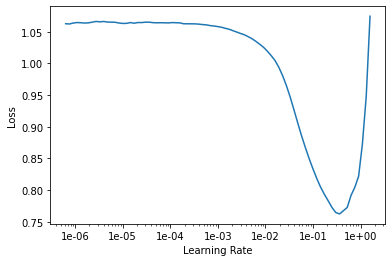

In [40]:
learn.recorder.plot()

In [41]:
lr= 0.01

In [42]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.691424,0.100641,0.957317,00:55
1,0.217196,0.061532,0.974716,00:07
2,0.107822,0.055972,0.976577,00:07
3,0.072382,0.052169,0.978553,00:07
4,0.058680,0.051410,0.978399,00:07


In [43]:
learn.save('/content/drive/My Drive/EAST/FD-stage1-resnet34')
#learn.load('/content/drive/My Drive/EAST/stage1-resnet34')

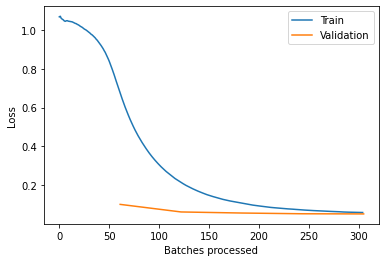

In [44]:
learn.recorder.plot_losses()

And now fine tune the whole model

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


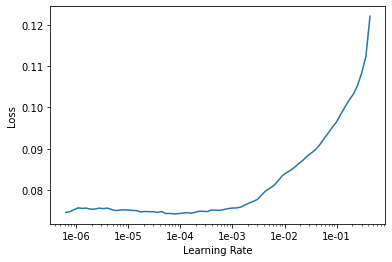

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/10))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.074976,0.118949,0.966420,0.247955,00:48
1,0.073762,0.117199,0.966590,0.252605,00:47
2,0.069308,0.118484,0.966840,0.270138,00:48
3,0.063462,0.117117,0.967050,0.269165,00:47
4,0.059754,0.117316,0.967050,0.273406,00:47


In [ ]:
#learn.save('/content/drive/My Drive/EAST/stage2-resnet34')
learn.load('/content/drive/My Drive/EAST/stage2-resnet34')

In [ ]:
preds, targs = learn.get_preds()

In [ ]:
preds[1]

In [ ]:
valid_list = ImageList.from_df(valid_df[['fpath', 'labels']], path=Path('/content/drive/My Drive/EAST/'))

In [ ]:
#IGNORE THIS CELL
'''dataframes = []

for item in 
preds, _ = learn.get_preds(valid_list)
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p>thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn.data.valid_ds.items]
df = pd.DataFrame({'image_name': fnames, 'tags': labelled_preds}, columns=['image', 'tags'])
dataframes.append(df)'''



In [ ]:
#IGNORE THIS CELL
'''sort_sample_mapping = {}
for count, i in enumerate(learn.data.valid_dl.sampler):
    sort_sample_mapping[i] = count

tmp_pred = learn.get_preds()

y_predicted_unsorted = []
y_gt_unsorted = []
for idx in range(0, len(tmp_pred[0])):
    pred = [x.tolist() for x in list(tmp_pred[0][idx])]
    max_val = max(pred)
    y_true_i = tmp_pred[1].tolist()[idx]
    y_pred_i = pred.index(max_val)
    y_predicted_unsorted.append(y_pred_i)
    y_gt_unsorted.append(y_true_i)

y_predicted_sorted = []
y_gt_sorted = []

for i in range(0, len(y_predicted_unsorted)):
    y_predicted_sorted.append(y_predicted_unsorted[sort_sample_mapping[i]])
    y_gt_sorted.append(y_gt_unsorted[sort_sample_mapping[i]])'''

In [ ]:
y_gt_sorted

In [ ]:
len(y_predicted_sorted)

500

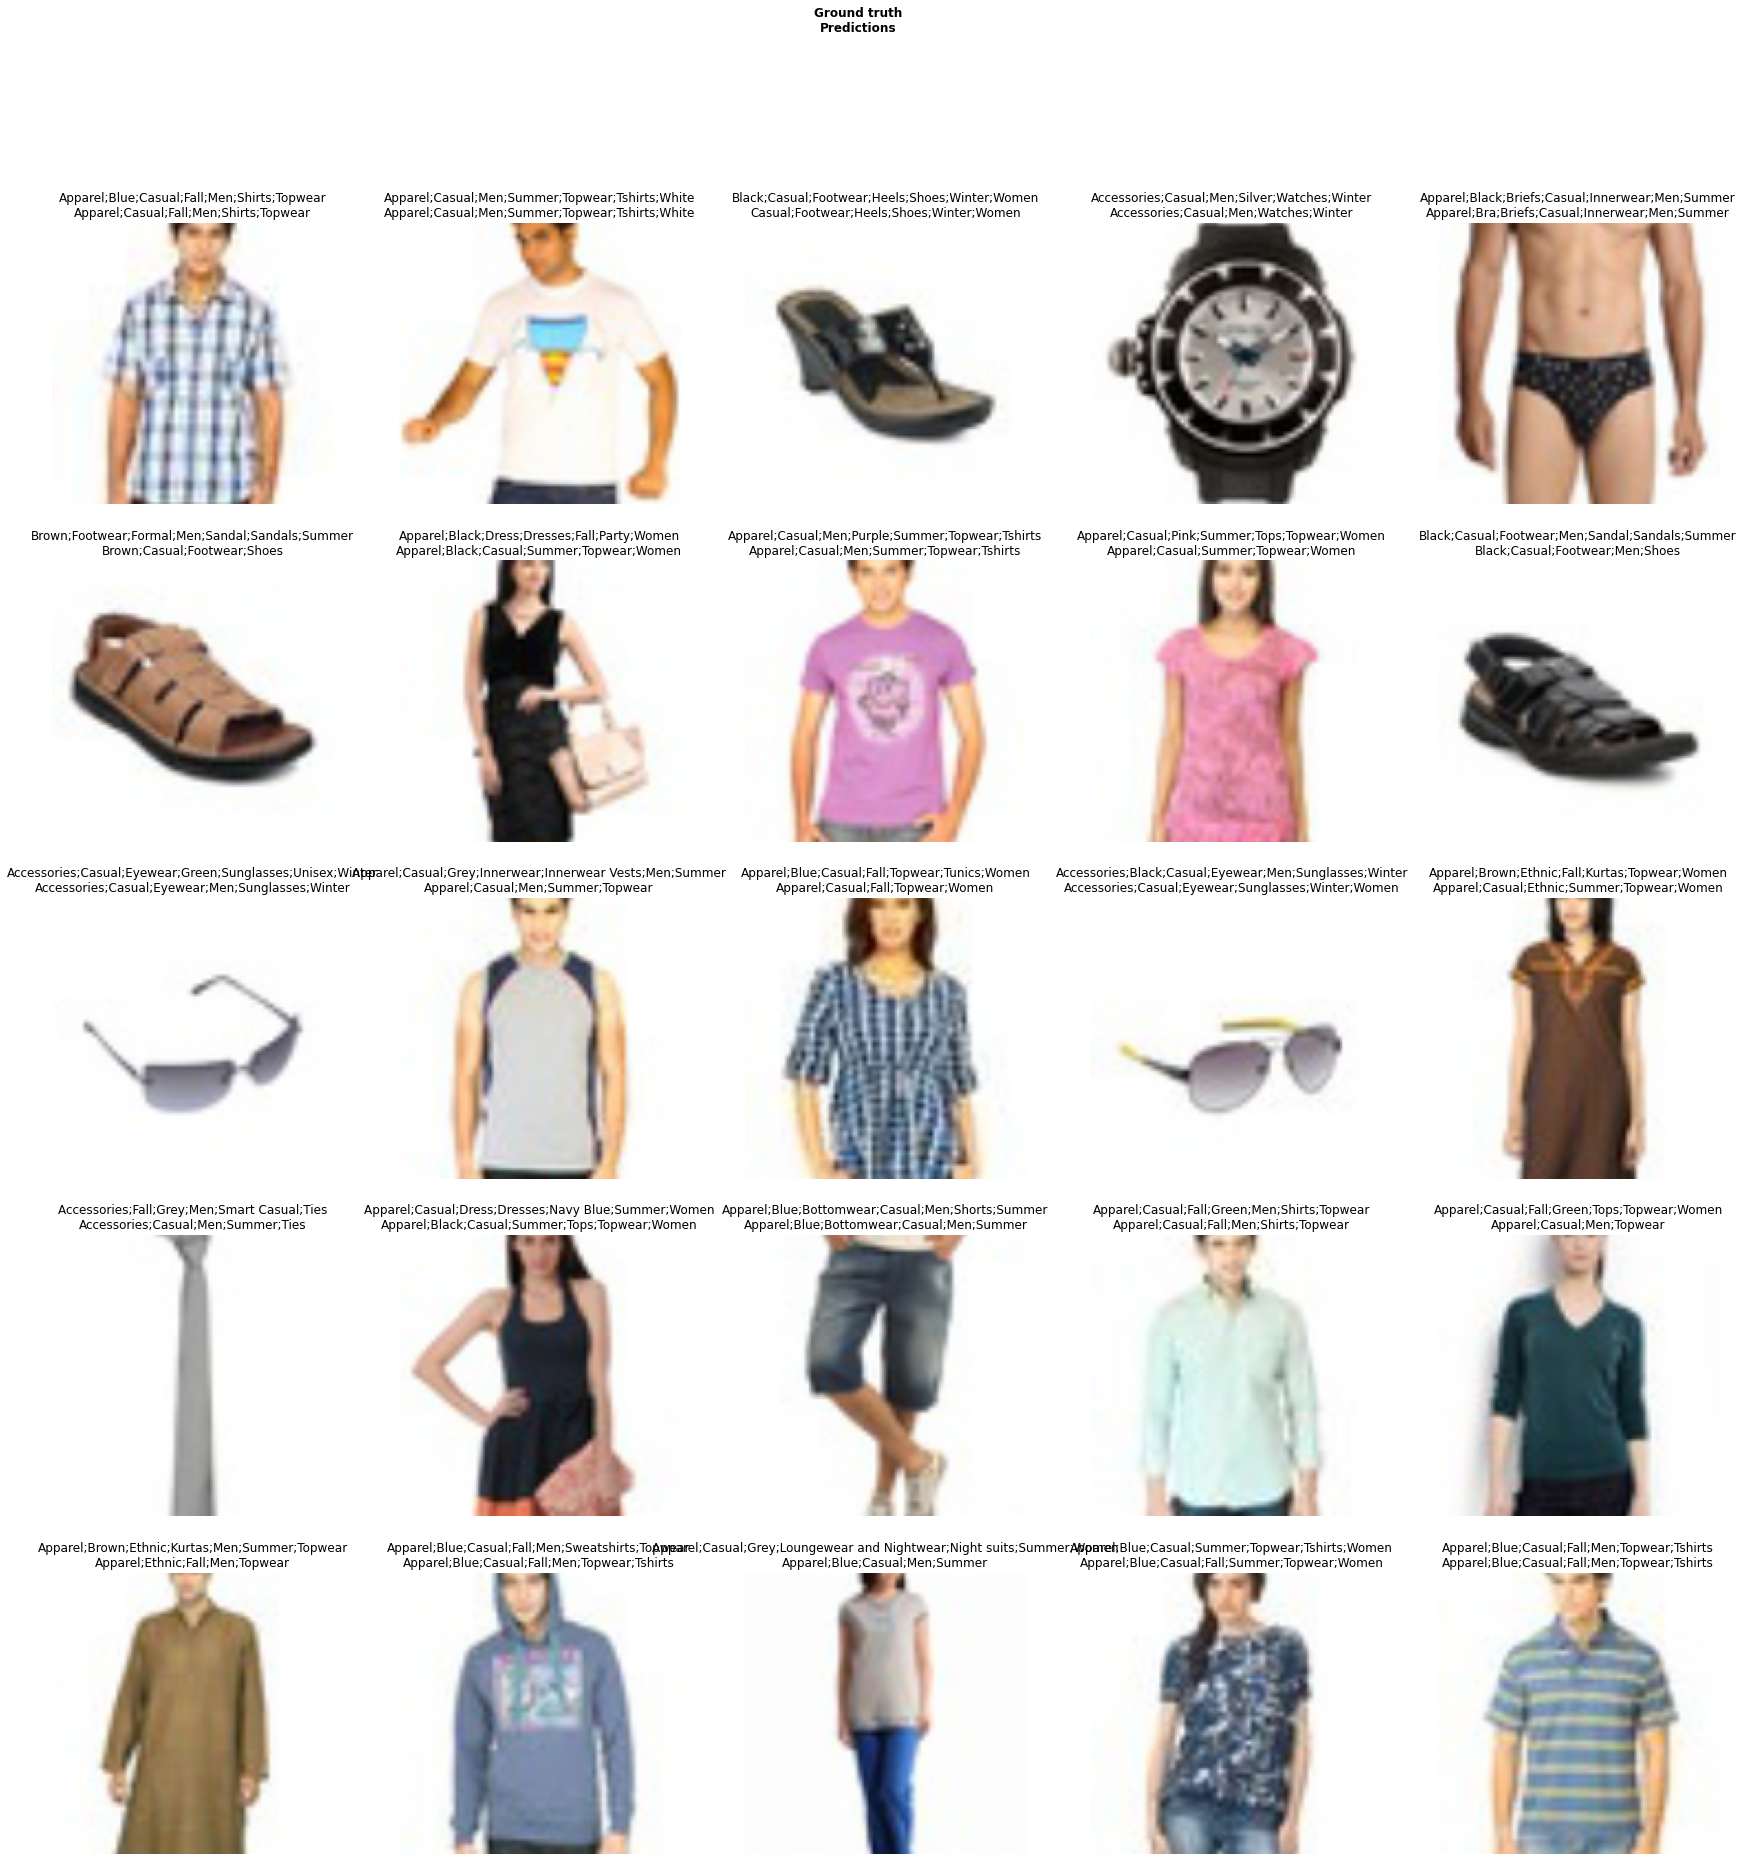

In [46]:
#Display predictions on validation set
data.valid_dl = data.valid_dl.new(shuffle=True)                                    #To view different validation batches each time 
learn.show_results(dl = data.valid_dl ,figsize=(30,30))                            